# Import packages

In [29]:
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import csv
import regex as re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx 
from collections import Counter
from fa2 import ForceAtlas2
from Functions import DataCollection, DataCleaning, GetConnectedMoviesArtist
from imdb import IMDb

# Data Collection 

In [30]:
# params = {
#         "thriller": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],[[]]]}, 
#         "action": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]},             
#         "comedy": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007"]]},
#         "adventure": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [["2020", "2021", "2022", "2023"], ["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"], ["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]}, 
#         "horror": {"years": ["2020", "2021", "2022", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019", "2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"], 
#                 "sub_years": [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]},
#         "fantasy": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [[[]],[[]],[[]]]}, 
#         "science_fiction": {"years": ["2020s", "2010s", "2000s"],
#                 "sub_years": [[[]],[[]],[[]]]}, 
#         }

# data_collection = DataCollection()
# data_movie_artist = pd.DataFrame()
# for genre in params.keys():
#     for years, sub_years in zip(params[genre]["years"],params[genre]["sub_years"]):
#         data = data_collection.collect_movies_artist_data(genre, years, sub_years)
#         data_movie_artist = pd.concat([data_movie_artist, data]) 

# data_movie_artist = data_movie_artist.reset_index(drop=True)

In [31]:
data_movie_artist = pd.read_json('data_movie_artist.json', orient='table')
data_movie_artist.shape

(7456, 7)

# Data Cleaning

In [5]:
# data_cleaner = DataCleaning(data_movie_artist)
# data_cleaner.data_cleaning()
# df_movies = data_cleaner.data

In [32]:
df_movies = pd.read_json('df_movies.json', orient='table')
df_movies.shape

(5780, 7)

In [78]:
df_all = pd.merge(df_movies, ratings, on='Title')

In [85]:
df_all.to_json('with_ratings.json', orient='table', indent=1)

In [37]:
movies_titles_set = set(df_movies['Title'])
ratings_titles_set = set(ratings['Title'])

# Find titles that exist in df_movies but not in ratings
titles_not_in_ratings = movies_titles_set - ratings_titles_set

# Convert the result back to a DataFrame if needed
titles_not_in_ratings_df = pd.DataFrame({'Title': list(titles_not_in_ratings)})

In [79]:
df_all 


,Title,Director,Cast,Country,Genre,Year,Hyperref,Rating
0,365 Days,barbara biaowas tomasz mandes,"anna-maria sieklucka,michele morrone, bronisaw...",europe,Thriller,2020,365_Days_(2020_film),3.3
1,7500,patrick vollrath,"joseph gordon-levitt,aylin tezel",mix,Action,2020,7500_(film),6.3
2,Archenemy,adam egypt mortimer,"joe manganiello,skylan brooks, zolee griggs,pa...",mix,Action,2020,Archenemy_(film),5.0
3,Asuraguru,araajdheep,"vikram prabhu,mahima nambiar,subbaraju,yogi babu",india,Action,2020,Asuraguru,3.3
4,Aswathama,ramana teja,"naga shourya,mehreen pirzada",india,Action,2020,Aswathama_(film),6.4
...,...,...,...,...,...,...,...,...
5775,The League of Extraordinary Gentlemen,stephen norrington,"sean connery,shane west,stuart townsend",united states,Mix,2003,The_League_of_Extraordinary_Gentlemen_(film),5.8
5776,The Promise,chen kaige,"hiroyuki sanada,jang dong-gun,cecilia cheung",china,Mix,2005,The_Promise_(2005_film),6.1
5777,Legend of the Guardians: The Owls of Ga'Hoole,zack snyder,"jim sturgess,joel edgerton,geoffrey rush,hugo ...",mix,Fantasy,2010,Legend_of_the_Guardians:_The_Owls_of_Ga%27Hoole,6.9
5778,Lethal,dustin rikert,"heather marie marsden,lorenzo lamas,frank zaga...",united states,Action,2004,Lethal_(film),7.8


# Collect Ratings

In [74]:
df_all[df_all['Title']=='A Good Day to Die Hard']

,Title,Director,Cast,Country,Genre,Year,Hyperref,Rating
754,A Good Day to Die Hard,john moore,"bruce willis,jai courtney,sebastian koch",united states,Action,2013,A_Good_Day_to_Die_Hard,NaN


In [80]:

# Assuming you have your original DataFrame df_all and the filtered_rows DataFrame
# Merge df_all and filtered_rows on the 'Title' column to update 'Rating' values
df_all = df_all.merge(filtered_rows, on='Title', how='left', suffixes=('', '_filtered'))

# Update 'Rating' values where a match is found, otherwise keep the original 'Rating' value
df_all['Rating'] = df_all['Rating_filtered'].combine_first(df_all['Rating'])

# Drop the 'Rating_filtered' column if needed
df_all.drop('Rating_filtered', axis=1, inplace=True)




                                              Title  \
0                                          365 Days   
1                                              7500   
2                                         Archenemy   
3                                         Asuraguru   
4                                         Aswathama   
...                                             ...   
5775          The League of Extraordinary Gentlemen   
5776                                    The Promise   
5777  Legend of the Guardians: The Owls of Ga'Hoole   
5778                                         Lethal   
5779                          Tucker & Dale vs Evil   

                           Director  \
0     barbara biaowas tomasz mandes   
1                  patrick vollrath   
2               adam egypt mortimer   
3                        araajdheep   
4                       ramana teja   
...                             ...   
5775             stephen norrington   
5776                     ch

In [81]:
df_all

,Title,Director,Cast,Country,Genre,Year,Hyperref,Rating
0,365 Days,barbara biaowas tomasz mandes,"anna-maria sieklucka,michele morrone, bronisaw...",europe,Thriller,2020,365_Days_(2020_film),3.3
1,7500,patrick vollrath,"joseph gordon-levitt,aylin tezel",mix,Action,2020,7500_(film),6.3
2,Archenemy,adam egypt mortimer,"joe manganiello,skylan brooks, zolee griggs,pa...",mix,Action,2020,Archenemy_(film),5.0
3,Asuraguru,araajdheep,"vikram prabhu,mahima nambiar,subbaraju,yogi babu",india,Action,2020,Asuraguru,3.3
4,Aswathama,ramana teja,"naga shourya,mehreen pirzada",india,Action,2020,Aswathama_(film),6.4
...,...,...,...,...,...,...,...,...
5775,The League of Extraordinary Gentlemen,stephen norrington,"sean connery,shane west,stuart townsend",united states,Mix,2003,The_League_of_Extraordinary_Gentlemen_(film),5.8
5776,The Promise,chen kaige,"hiroyuki sanada,jang dong-gun,cecilia cheung",china,Mix,2005,The_Promise_(2005_film),6.1
5777,Legend of the Guardians: The Owls of Ga'Hoole,zack snyder,"jim sturgess,joel edgerton,geoffrey rush,hugo ...",mix,Fantasy,2010,Legend_of_the_Guardians:_The_Owls_of_Ga%27Hoole,6.9
5778,Lethal,dustin rikert,"heather marie marsden,lorenzo lamas,frank zaga...",united states,Action,2004,Lethal_(film),7.8


In [84]:
df_all['Title'][df_all['Rating'].isnull()]

20                The Crimes That Bind
23                The Nest sean durkin
41             Master lokesh kanagaraj
52               The Hole in the Fence
75                          Monkey Man
                     ...              
5634                The Last Airbender
5657      The Nest florent emilio siri
5689                 The Ultimate Task
5740    Wonder Woman lauren montgomery
5741        Wonder Woman patty jenkins
Name: Title, Length: 428, dtype: object

In [60]:
movies_df = df_all[['Title', 'Year']][df_all['Rating'].isnull()].copy()


In [61]:
movies_df

,Title,Year
20,The Crimes That Bind,2020
23,The Nest sean durkin,2020
41,Master lokesh kanagaraj,2021
52,The Hole in the Fence,2021
75,Monkey Man,2022
...,...,...
5657,The Nest florent emilio siri,2002
5672,The Purge: Election Year,2016
5689,The Ultimate Task,2013
5740,Wonder Woman lauren montgomery,2009


In [62]:
# Initialize the IMDb object
ia = IMDb()

# Function to get movie rating
def get_movie_rating(title):
    try:
        movie = ia.search_movie(title)[0]  # Assume the first search result is the correct movie
        ia.update(movie)
        return movie.data['rating']
    except Exception as e:
        return None

# Add a new column to the DataFrame with the ratings
movies_df['Rating'] = movies_df['Title'].apply(get_movie_rating)

2023-11-17 09:27:32,374 CRITICAL [imdbpy] /opt/anaconda3/lib/python3.8/site-packages/imdb/_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/find/?q=Pag+Oras+Mo%2C+Oras+Mo+Na&s=tt', 'proxy': '', 'exception type': 'IOError', 'original exception': <HTTPError 500: 'Internal Server Error'>},); kwds: {}
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/imdb/parser/http/__init__.py", line 233, in retrieve_unicode
    response = uopener.open(url)
  File "/opt/anaconda3/lib/python3.8/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/anaconda3/lib/python3.8/urllib/request.py", line 640, in http_response
    response = self.parent.error(
  File "/opt/anaconda3/lib/python3.8/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/anaconda3/lib/python3.8/urllib/request.py", line 502, in _call_chain
    result = func(*ar

In [71]:
filtered_rows = movies_df[~movies_df['Rating'].isnull()][['Title', 'Rating']]

In [72]:
filtered_rows

,Title,Rating
583,KGF: Chapter 2,8.3
750,The Four II,6.1
754,A Good Day to Die Hard,5.2
757,Hummingbird,6.2
786,American Sniper,7.3
1195,Never Back Down,6.5
1341,The Bad Guys,6.8
1386,Jackass 3D,7.0
1392,Little Fockers,5.5
1394,Loose Cannons,7.2


In [8]:
movies_df[['Title','Rating']].to_json('ratings4000.json', orient='table', indent=1)

In [11]:
movies_df

,Title,Director,Cast,Country,Genre,Year,Hyperref,Rating
4000,Hostel: Part II,eli roth,"lauren german,roger bart,heather matarazzo,bij...",united states,Horror,2007,Hostel:_Part_II,5.5
4001,House,robby henson,"michael madsen,reynaldo rosales, heidi dippold",united states,Horror,2007,House_(2007_film),8.7
4002,House of Fears,ryan little,"corri english,sandra mc coy,corey sevier",united states,Horror,2007,House_of_Fears,4.7
4003,I Am Legend,francis lawrence,"will smith,alice braga,salli richardson-whitfield",united states,Science Fiction,2007,I_Am_Legend_(film),7.2
4004,Ice Spiders,tibor takacs,"vanessa a williams,patrick muldoon, carleigh king",united states,Horror,2007,Ice_Spiders,3.2
...,...,...,...,...,...,...,...,...
5775,The League of Extraordinary Gentlemen,stephen norrington,"sean connery,shane west,stuart townsend",united states,Mix,2003,The_League_of_Extraordinary_Gentlemen_(film),5.8
5776,The Promise,chen kaige,"hiroyuki sanada,jang dong-gun,cecilia cheung",china,Mix,2005,The_Promise_(2005_film),6.1
5777,Legend of the Guardians: The Owls of Ga'Hoole,zack snyder,"jim sturgess,joel edgerton,geoffrey rush,hugo ...",mix,Fantasy,2010,Legend_of_the_Guardians:_The_Owls_of_Ga%27Hoole,6.9
5778,Lethal,dustin rikert,"heather marie marsden,lorenzo lamas,frank zaga...",united states,Action,2004,Lethal_(film),7.8


In [64]:
movies_df[['Title','Rating']].shape

(1000, 2)

In [66]:
movies_df[['Title','Rating']].to_json('ratings3000_4000.json', orient='table', indent=1)

In [15]:
rating1 = pd.read_csv('ratings0_2350.csv')

In [16]:
rating1


,Unnamed: 0,Title,Rating
0,0,365 Days,3.3
1,1,7500,6.3
2,2,Archenemy,5.0
3,3,Asuraguru,3.3
4,4,Aswathama,6.4
...,...,...,...
2345,2492,Northmen: A Viking Saga,5.4
2346,2493,Outcast,7.3
2347,2494,Pompeii,5.5
2348,2495,The Pirates,8.1


In [18]:
rating2 = pd.read_json('ratings2350_3000.csv', orient='table')

In [19]:
rating2

,Title,Rating
2418,Seventh Son,5.5
2419,Theeb,7.2
2420,Trash,7.1
2421,La Vie pure,6.5
2422,The Water Diviner,7.0
...,...,...
2995,The Twin,8.5
2996,The Visitor,4.2
2997,The Witch: Part 2 The Other One,6.2
2998,The Womb,5.9


In [20]:
rating3 = pd.read_json('ratings3000_4000.json', orient='table')

In [22]:
rating4 = pd.read_json('ratings4000.json', orient='table')

In [23]:
rating4

,Title,Rating
4000,Hostel: Part II,5.5
4001,House,8.7
4002,House of Fears,4.7
4003,I Am Legend,7.2
4004,Ice Spiders,3.2
...,...,...
5775,The League of Extraordinary Gentlemen,5.8
5776,The Promise,6.1
5777,Legend of the Guardians: The Owls of Ga'Hoole,6.9
5778,Lethal,7.8


In [45]:
ratings = pd.concat([rating1[['Title', 'Rating']], rating2, rating3, rating4, movies_df[['Title','Rating']]])

In [46]:
ratings

,Title,Rating
0,365 Days,3.3
1,7500,6.3
2,Archenemy,5.0
3,Asuraguru,3.3
4,Aswathama,6.4
...,...,...
63,Snakes on a Plane,5.5
64,Red: Werewolf Hunter,4.3
65,The Haunted Cinema,NaN
66,Don't Kill It,5.2


# Get connected Movies and Artists

In [5]:
# get_connected_movies_artists = GetConnectedMoviesArtist()
# connected_movies = get_connected_movies_artists.connected_movies_and_cast(df_movies)
# with open('connected_movies_and_casts.json', 'w') as file:
#     json.dump(connected_movies, file, indent=4)

In [3]:
with open('connected_movies_and_casts.json', 'r') as file:
    connected_movies = json.load(file)

In [84]:
len(connected_movies.keys())

NameError: name 'connected_movies' is not defined

In [5]:
connected_movies

{'365 Days': {'365 Days: This Day': ['michele morrone',
   'anna-maria sieklucka',
   'magdalena lamparska']},
 '7500': {'Looper': ['joseph gordon-levitt'],
  'Premium Rush': ['joseph gordon-levitt'],
  'Sin City: A Dame to Kill For': ['joseph gordon-levitt'],
  'Hesher': ['joseph gordon-levitt'],
  '50/50': ['joseph gordon-levitt'],
  'Don Jon': ['joseph gordon-levitt'],
  'The Walk': ['joseph gordon-levitt'],
  'GI Joe: The Rise of Cobra': ['joseph gordon-levitt'],
  'Inception': ['joseph gordon-levitt'],
  'Project Power': ['joseph gordon-levitt'],
  'Treasure Planet': ['joseph gordon-levitt']},
 'Archenemy': {'No Sudden Move': ['amy seimetz'],
  'Sabotage': ['joe manganiello'],
  'The Sleepover': ['joe manganiello'],
  'The Spine of Night': ['joe manganiello'],
  'Pet Sematary': ['amy seimetz'],
  'Rampage': ['joe manganiello'],
  'Upstream Color': ['amy seimetz']},
 'Asuraguru': {'Cocktail ra vijaya murugan': ['yogi babu']},
 'Aswathama': {},
 'Attack': {'Satyameva Jayate 2': ['jo

# Basic Statistics

### Genre distribution

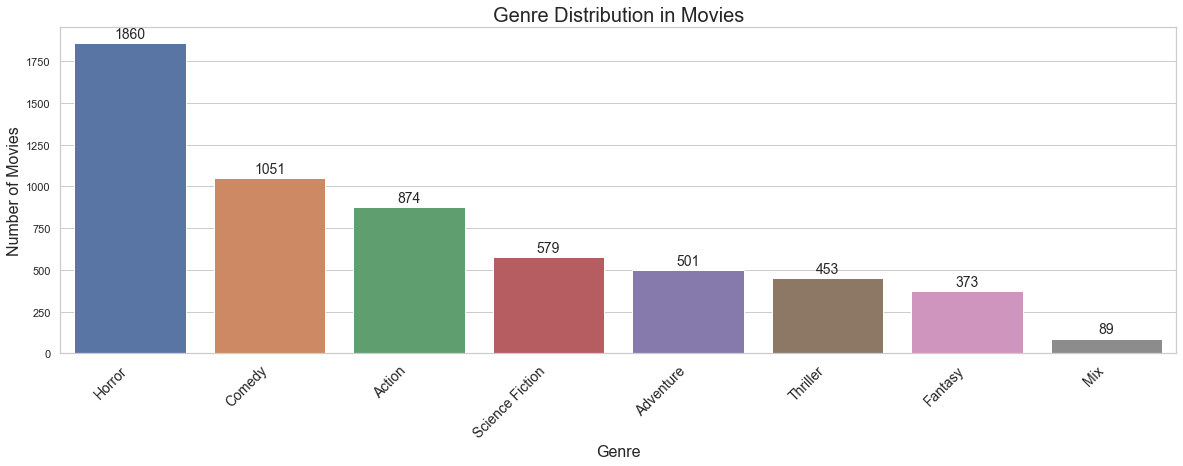

In [12]:
genre_counts = df_movies['Genre'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Genre', 'Count']

# Create the bar plot
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 6)) 
barplot = sns.barplot(x='Genre', y='Count', data=genre_counts)

# Rotate the labels on x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Genre Distribution in Movies', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

### Movies over time 

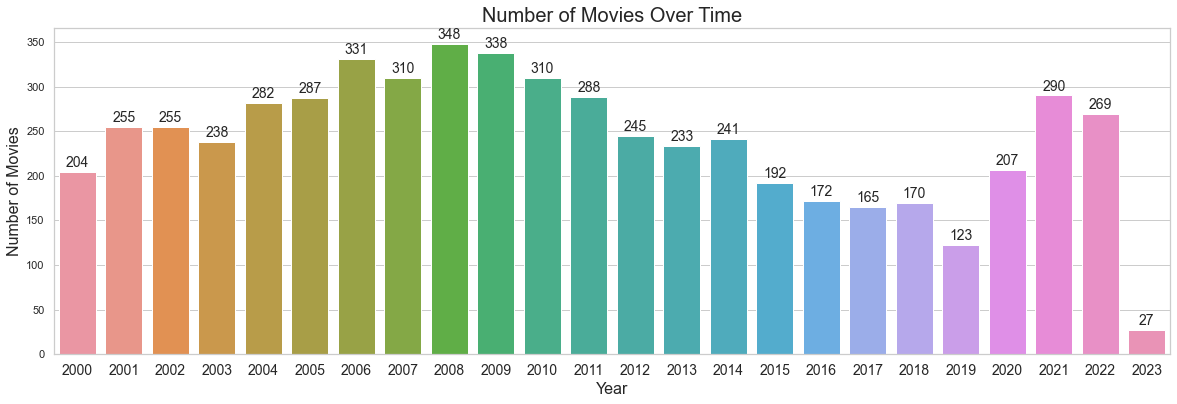

In [13]:
df_movies['Year'] = pd.to_numeric(df_movies['Year'], errors='coerce')
movies_per_year = df_movies.groupby('Year').size()
movies_per_year = movies_per_year.reset_index()
movies_per_year.columns = ['Year', 'Number of Movies']

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Year', y='Number of Movies', data=movies_per_year)
plt.xticks(fontsize=14)
plt.title('Number of Movies Over Time', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

### Country distribution

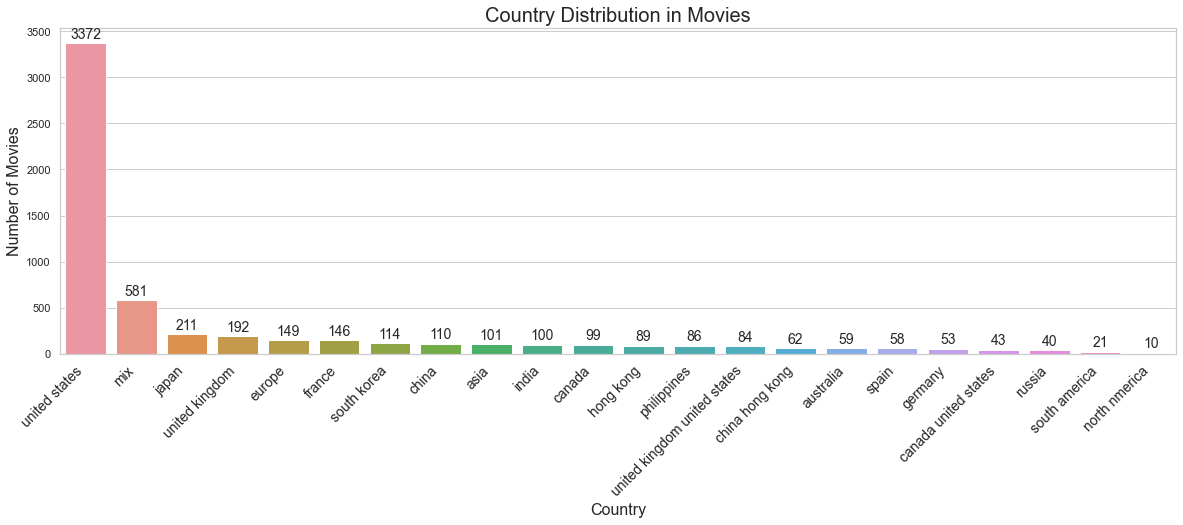

In [14]:
genre_counts = df_movies['Country'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Country', 'Count']

# Create the bar plot
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 6)) 
barplot = sns.barplot(x='Country', y='Count', data=genre_counts)

# Rotate the labels on x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Country Distribution in Movies', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

# Network Science

### Creating undirected graph with nodes as artists and edges between artists that have collaborated in movie together

In [16]:
# # Create undirected Graph
G_artist = nx.Graph()

# Adding nodes
all_artist_nodes = list(list(df_movies['Title'].unique()))
G_artist.add_nodes_from(all_artist_nodes)

# Adding edges
for movie, connected_movies in zip(df_movies['Title'], df_movies['Connected Movies']):
    G_artist.add_edges_from([(movie, col) for col in connected_movies])

KeyError: 'Connected Movies'

In [61]:
node_attr = df_movies[['Title', 'Genre', 'Year']].set_index('Title').to_dict('index') 
nx.set_node_attributes(G_artist, node_attr) #Adding attributes to the graph

In [62]:
print("The network consist of: ", G_artist.number_of_edges(), " links")
print("The network consist of: ", G_artist.number_of_nodes(), " nodes (Movies)")

The network consist of:  34940  links
The network consist of:  5724  nodes (Movies)


In [43]:
# # Initialize the graph
# G_artist = nx.Graph()

# # Add nodes
# all_artist_nodes = list(list(artist_collaboration_df['Cast'].unique()))
# G_artist.add_nodes_from(all_artist_nodes)

# # Initialize a Counter to keep track of collaborations
# collaboration_counter = Counter()

# # Update the Counter with each collaboration
# for artist, collaborators in zip(artist_collaboration_df['Cast'], artist_collaboration_df['connected']):
#     for collaborator in collaborators:
#         if artist != collaborator:
#             collaboration_pair = tuple(sorted([artist, collaborator]))
#             collaboration_counter[collaboration_pair] += 1

# # Add weighted edges to the graph
# for (artist1, artist2), weight in collaboration_counter.items():
#     G_artist.add_edge(artist1, artist2, weight=weight)


In [63]:
print("The average degree of the GCC is:", round(sum(dict(G_artist.degree()).values())/len(G_artist.degree)))

The average degree of the GCC is: 12


### Extracting the largest component

In [64]:
#Extracting the largest component
connected_components = nx.connected_components(G_artist)
# Finding the largest connected component
largest_cc = max(connected_components, key=len)
# Creating a subgraph for the largest connected component
G_largest_cc = G_artist.subgraph(largest_cc).copy()

In [65]:
print("The largest connected component network consist of: ", G_largest_cc.number_of_edges(), " links")
print("The largest connected component network consist of: ", G_largest_cc.number_of_nodes(), " nodes (Movies)")

The largest connected component network consist of:  34562  links
The largest connected component network consist of:  4187  nodes (Movies)


In [66]:
print("The average degree of the GCC is:", round(sum(dict(G_largest_cc.degree()).values())/len(G_largest_cc.degree)))

The average degree of the GCC is: 17


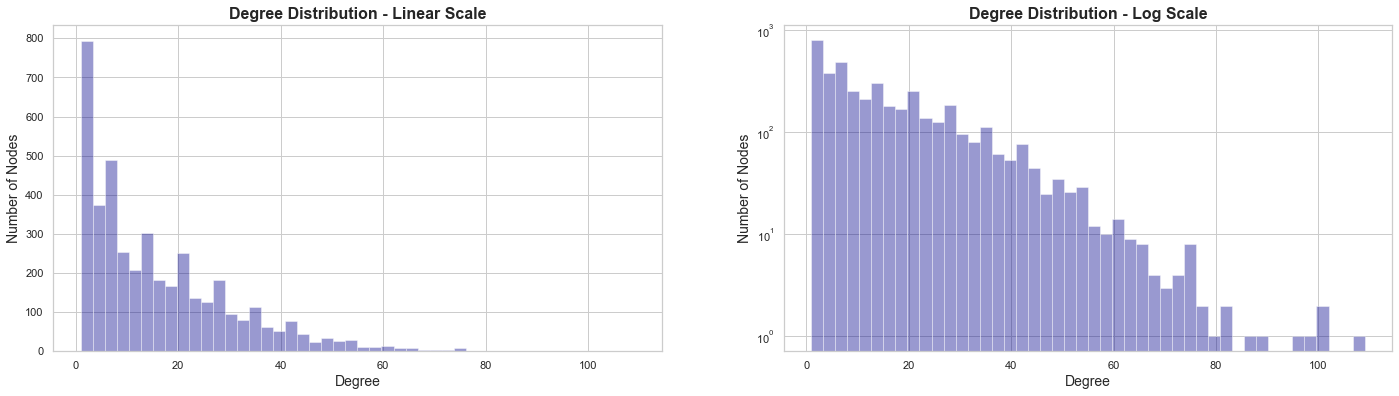

In [47]:
# Calculating degrees for each node
degrees = [G_largest_cc.degree(n) for n in G_largest_cc.nodes()]

# Convert the degrees list to a DataFrame
degrees_df = pd.DataFrame(degrees, columns=['Degree'])

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))

# First subplot for the regular scale histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.distplot(degrees_df['Degree'], kde=False, color='darkblue', hist_kws={'edgecolor':'white'})
plt.title('Degree Distribution - Linear Scale', fontweight="bold", fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)

# Second subplot for the logarithmic scale histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.distplot(degrees_df['Degree'], kde=False, color='darkblue', hist_kws={'edgecolor':'white'})
plt.title('Degree Distribution - Log Scale', fontweight="bold", fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.yscale('log')

# Show the plot
plt.show()


### Top connected artists

In [48]:
degrees = dict(G_largest_cc.degree())
degrees_artists = {node: degree for node, degree in degrees.items()}
top_connected = sorted(degrees_artists, key=degrees_artists.get, reverse=True)[:5]
print("Top 5 connected artists: ", top_connected)


Top 5 connected artists:  ['Amsterdam', 'Don t Look Up', 'Thor Love and Thunder', 'Avengers Endgame', 'Dolittle']


### Plot the network

In [221]:
# The Force Atlas 2 algorithm
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs  # (NOT IMPLEMENTED)
                        linLogMode=False,   # (NOT IMPLEMENTED)
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=5.0,

                        # Performance
                        jitterTolerance=0.6,  # Not above 1. 1 is more precise
                        barnesHutOptimize=True,
                        barnesHutTheta=1, # Try 2
                        multiThreaded=False ,  # (NOT IMPLEMENTED)

                        # Tuning
                        scalingRatio=10.0, # Greater number equals less sparse graph
                        strongGravityMode=True,
                        gravity=1500, # Try 1000 is somewhat round but 2000 is very round

                        # Log
                        verbose=True)


In [222]:
positions = forceatlas2.forceatlas2_networkx_layout(G_largest_cc, pos=None, iterations=1000)

100%|██████████| 1000/1000 [01:34<00:00, 10.62it/s]

BarnesHut Approximation  took  20.05  seconds
Repulsion forces  took  70.77  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  1.17  seconds
AdjustSpeedAndApplyForces step  took  0.77  seconds


In [224]:
#Setting up node sizes (depends on degree)
d = dict(G_largest_cc.degree)
deg_size = [v * 3 for v in d.values()]

In [225]:
#Setting up node colors (depends on genre)
nodes_color = []
for node in G_largest_cc.nodes.data():
    if node[1]['Genre'] == 'horror':
        nodes_color.append('red')
    elif (node[1]['Genre'] == 'action'):
        nodes_color.append('#DA70D6')
    elif (node[1]['Genre'] == 'comedy'):
        nodes_color.append('blue')
    elif (node[1]['Genre'] == 'thriller'):
        nodes_color.append('#008080')
    elif (node[1]['Genre'] == 'science_fiction'):
        nodes_color.append('#4B0082')
    elif (node[1]['Genre'] == 'adventure'):
        nodes_color.append('yellow')
    elif (node[1]['Genre'] == 'fantasy'):
        nodes_color.append('orange')
    else:
        nodes_color.append('pink')

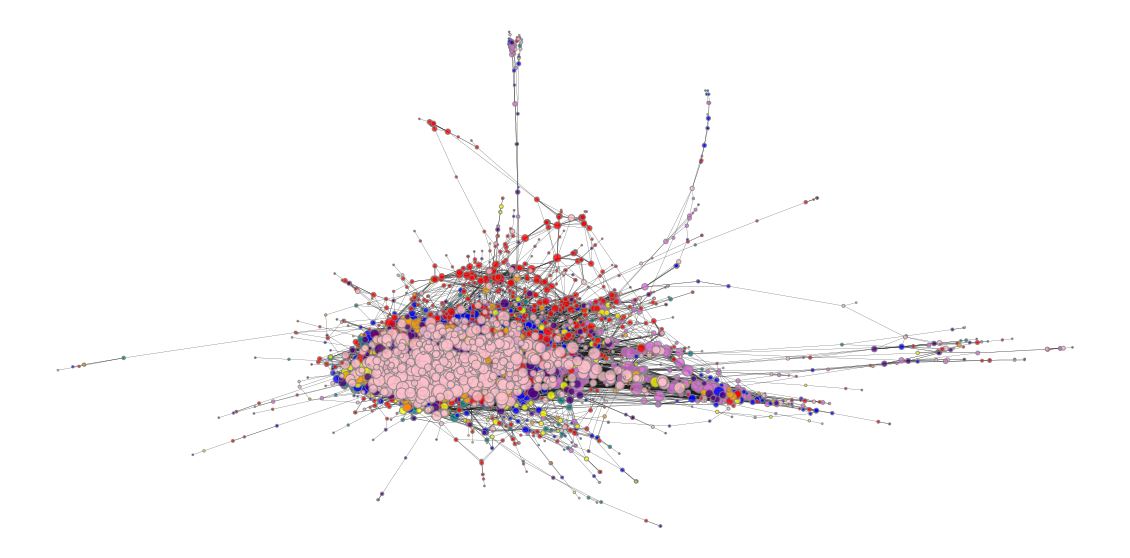

In [226]:
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G_largest_cc, positions, node_size=deg_size, node_color=nodes_color, alpha=0.80, edgecolors='grey')
nx.draw_networkx_edges(G_largest_cc, positions, width = 0.2)#, edge_color=edge_colors,width=0.5)
plt.axis('off')
plt.show()